In [93]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
data = yf.download("MSFT AAPL KRX NVDA", start="2015-01-01", end="2020-04-30",
                   group_by="ticker")
msft = pd.DataFrame(data['MSFT'])
apple = pd.DataFrame(data['AAPL'])
samsung = pd.DataFrame(data['KRX'])
nvda = pd.DataFrame(data['NVDA'])

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- KRX: No data found for this date range, symbol may be delisted


In [94]:
# msft = msft.assign(Profit = lambda x: x['Open'] - x['Close'])
# apple = apple.assign(Profit = lambda x: x['Open'] - x['Close'])
# samsung = samsung.assign(Profit = lambda x: x['Open'] - x['Close'])
# nvda = nvda.assign(Profit = lambda x: x['Open'] - x['Close'])

In [95]:
# msft = msft.assign(Difference = lambda x: x['High'] - x['Low'])
# apple = apple.assign(Difference = lambda x: x['High'] - x['Low'])
# samsung = samsung.assign(Difference = lambda x: x['High'] - x['Low'])
# nvda = nvda.assign(Difference = lambda x: x['High'] - x['Low'])

In [96]:
def highlow(df):
    df = df.assign(Difference = lambda x: x['High'] - x['Low'])
    return df

In [97]:
def profit(df):
    df = df.assign(Profit = lambda x: x['Open'] - x['Close'])
    return df

In [98]:
def pctchg(df):
    df['Profit Percent Change'] = df['Profit'].pct_change()
    return df

In [99]:
def cleandat(df):
    df = df.round(2)
    df["Profit Percent Change"] = df["Profit Percent Change"].map('{:,.2f}%'.format)
    df["Profit"] = df["Profit"].map("${:,.2f}".format)
    df["Difference"] = df["Difference"].map("${:,.2f}".format)
    df["High"] = df["High"].map("${:,.2f}".format)
    df["Low"] = df["Low"].map("${:,.2f}".format)
    df["Open"] = df["Open"].map("${:,.2f}".format)
    #df["Close"] = df["Close"].map("${:,.2f}".format)
    df["Adj Close"] = df["Adj Close"].map("${:,.2f}".format)
    df["Volume"] = df["Volume"].map("{:,.0f}".format)
    return df
    

In [100]:

# samsung = pctchg(samsung)
# samsung.head()

In [101]:
dfs = [msft, apple, samsung, nvda]

for i,df in enumerate(dfs):
    df = highlow(df)
    df = profit(df)
    df = pctchg(df)
    df = cleandat(df)
    display(df[:5])
    dfs[i]=df

,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change
Date,,,,,,,,,
2015-01-02,$46.66,$47.42,$46.54,46.76,$40.93,"27,913,900",$0.88,$-0.10,nan%
2015-01-05,$46.37,$46.73,$46.25,46.33,$40.55,"39,673,900",$0.48,$0.04,-1.40%
2015-01-06,$46.38,$46.75,$45.54,45.65,$39.95,"36,447,900",$1.21,$0.73,17.25%
2015-01-07,$45.98,$46.46,$45.49,46.23,$40.46,"29,114,100",$0.97,$-0.25,-1.34%
2015-01-08,$46.75,$47.75,$46.72,47.59,$41.65,"29,645,200",$1.03,$-0.84,2.36%


,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change
Date,,,,,,,,,
2015-01-02,$27.85,$27.86,$26.84,27.33,$24.64,"212,818,400",$1.02,$0.51,nan%
2015-01-05,$27.07,$27.16,$26.35,26.56,$23.95,"257,142,000",$0.81,$0.51,-0.01%
2015-01-06,$26.64,$26.86,$26.16,26.57,$23.95,"263,188,400",$0.70,$0.07,-0.86%
2015-01-07,$26.80,$27.05,$26.67,26.94,$24.29,"160,423,600",$0.38,$-0.14,-2.96%
2015-01-08,$27.31,$28.04,$27.17,27.97,$25.22,"237,458,000",$0.86,$-0.66,3.84%


,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change
Date,,,,,,,,,
2015-01-02,$nan,$nan,$nan,NaN,$nan,nan,$nan,$nan,nan%
2015-01-05,$nan,$nan,$nan,NaN,$nan,nan,$nan,$nan,nan%
2015-01-06,$nan,$nan,$nan,NaN,$nan,nan,$nan,$nan,nan%
2015-01-07,$nan,$nan,$nan,NaN,$nan,nan,$nan,$nan,nan%
2015-01-08,$nan,$nan,$nan,NaN,$nan,nan,$nan,$nan,nan%


,Open,High,Low,Close,Adj Close,Volume,Difference,Profit,Profit Percent Change
Date,,,,,,,,,
2015-01-02,$5.03,$5.07,$4.95,5.03,$4.84,"11,368,000",$0.12,$0.00,nan%
2015-01-05,$5.03,$5.05,$4.93,4.95,$4.75,"19,795,200",$0.12,$0.08,inf%
2015-01-06,$4.95,$4.96,$4.79,4.80,$4.61,"19,776,400",$0.17,$0.16,0.85%
2015-01-07,$4.83,$4.88,$4.77,4.78,$4.60,"32,180,800",$0.11,$0.05,-0.70%
2015-01-08,$4.84,$4.99,$4.84,4.97,$4.77,"28,378,000",$0.16,$-0.12,-3.63%


In [102]:
df['Close']


Date
2015-01-02     5.03
2015-01-05     4.95
2015-01-06     4.80
2015-01-07     4.78
2015-01-08     4.97
              ...  
2020-04-23    71.00
2020-04-24    72.40
2020-04-27    74.27
2020-04-28    72.84
2020-04-29    74.61
Name: Close, Length: 1340, dtype: float64

In [103]:
msft = dfs[0]
aapl = dfs[1]
sams = dfs[2]
nvda = dfs[3]

Text(0.5, 0, 'Month')

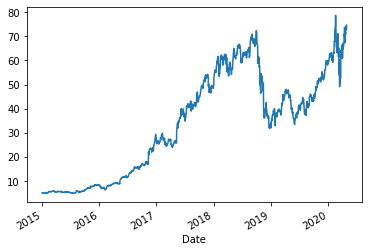

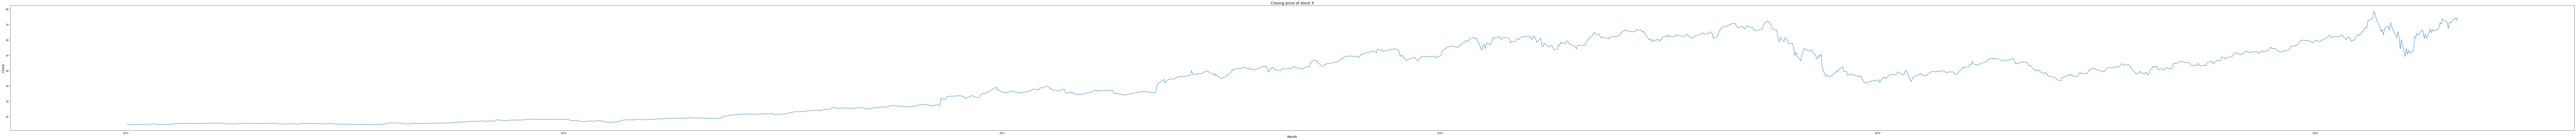

In [104]:
dates = [] # this list consists of a collection of dates 

"""
Plot
"""
df["Close"].plot()
plt.figure(figsize=(200, 10))
plt.plot(df.index, df["Close"])
for d in dates:
    plt.axvline(x=f"{d}", color="green")

# Give a title
plt.title("Closing price of stock X", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Close', fontsize=14)
plt.xlabel('Month', fontsize=14)



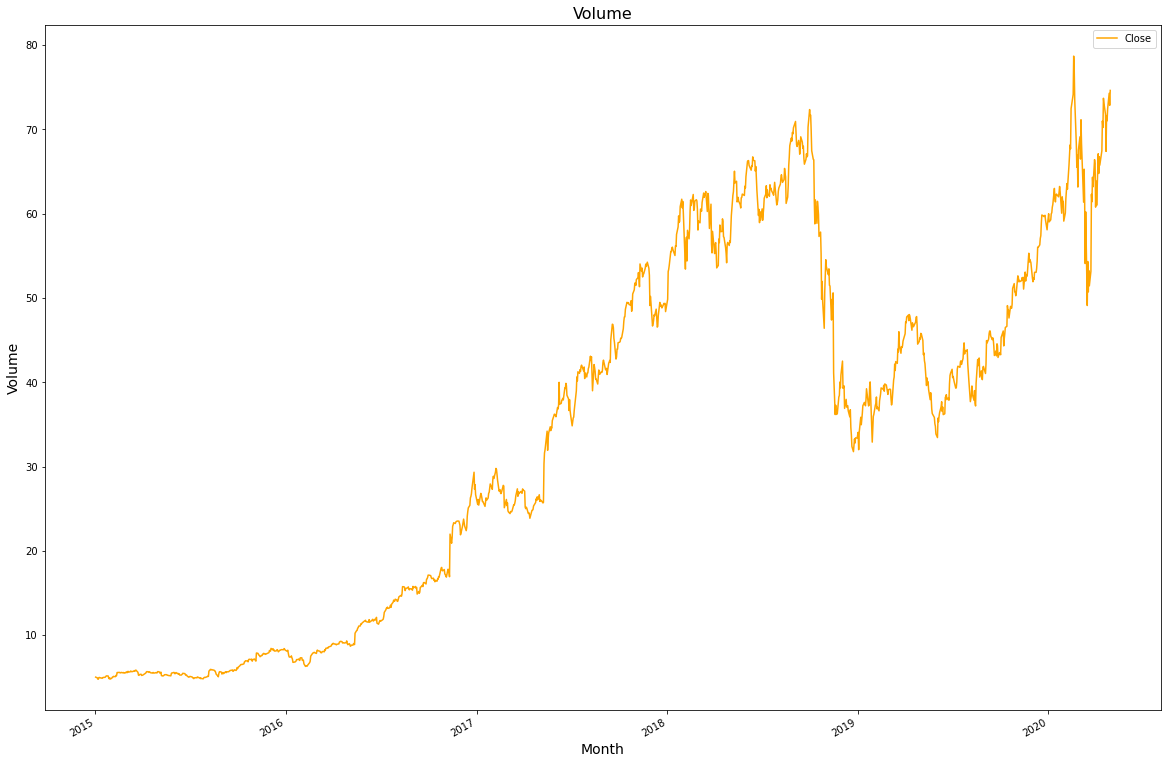

In [105]:
# Plot all the volume data
df.plot(figsize=(20, 14), color=["orange", "blue"])
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Volume", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'line'

TypeError: list indices must be integers or slices, not str